In [1]:
from google.colab import files

In [2]:
files.upload()

Saving fetal_health.csv to fetal_health.csv


{'fetal_health.csv': b'baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health\n120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0\n132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0\n133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0\n134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0\n132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
df=pd.read_csv('fetal_health.csv')

In [5]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

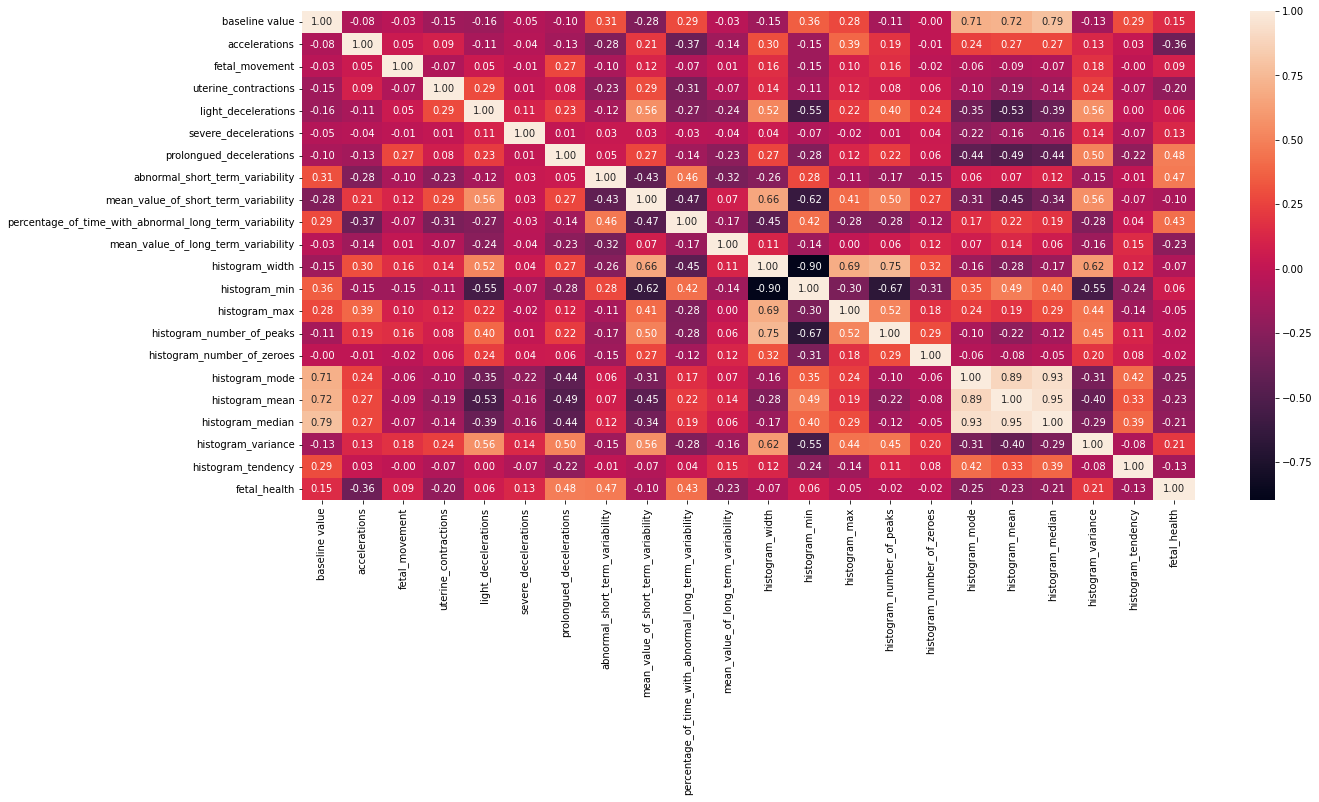

In [7]:
corelation=df.corr()
plt.figure(figsize=(20,9))
sns.heatmap(corelation,annot=True,fmt='0.2f')

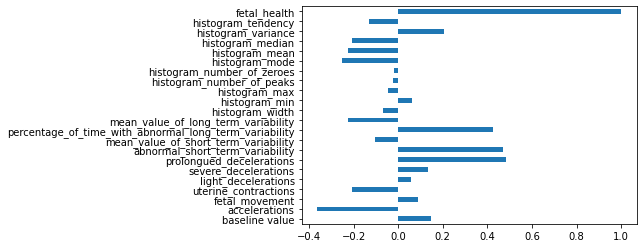

In [8]:
df.corr()['fetal_health'].plot(kind='barh')

In [9]:
df[df.corr()['fetal_health'].nlargest(15).keys()]

,fetal_health,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,baseline value,severe_decelerations,fetal_movement,histogram_min,light_decelerations,histogram_number_of_zeroes,histogram_number_of_peaks,histogram_max,histogram_width,mean_value_of_short_term_variability
0,2.0,0.0,73.0,43.0,73.0,120.0,0.0,0.000,62.0,0.000,0.0,2.0,126.0,64.0,0.5
1,1.0,0.0,17.0,0.0,12.0,132.0,0.0,0.000,68.0,0.003,1.0,6.0,198.0,130.0,2.1
2,1.0,0.0,16.0,0.0,13.0,133.0,0.0,0.000,68.0,0.003,1.0,5.0,198.0,130.0,2.1
3,1.0,0.0,16.0,0.0,13.0,134.0,0.0,0.000,53.0,0.003,0.0,11.0,170.0,117.0,2.4
4,1.0,0.0,16.0,0.0,11.0,132.0,0.0,0.000,53.0,0.000,0.0,9.0,170.0,117.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2.0,0.0,79.0,25.0,2.0,140.0,0.0,0.000,137.0,0.000,0.0,4.0,177.0,40.0,0.2
2122,2.0,0.0,78.0,22.0,3.0,140.0,0.0,0.000,103.0,0.000,0.0,6.0,169.0,66.0,0.4
2123,2.0,0.0,79.0,20.0,4.0,140.0,0.0,0.000,103.0,0.000,0.0,5.0,170.0,67.0,0.4
2124,2.0,0.0,78.0,27.0,4.0,140.0,0.0,0.000,103.0,0.000,0.0,6.0,169.0,66.0,0.4


In [10]:
df=df[df.corr()['fetal_health'].nlargest(15).keys()]

In [11]:
df

,fetal_health,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,baseline value,severe_decelerations,fetal_movement,histogram_min,light_decelerations,histogram_number_of_zeroes,histogram_number_of_peaks,histogram_max,histogram_width,mean_value_of_short_term_variability
0,2.0,0.0,73.0,43.0,73.0,120.0,0.0,0.000,62.0,0.000,0.0,2.0,126.0,64.0,0.5
1,1.0,0.0,17.0,0.0,12.0,132.0,0.0,0.000,68.0,0.003,1.0,6.0,198.0,130.0,2.1
2,1.0,0.0,16.0,0.0,13.0,133.0,0.0,0.000,68.0,0.003,1.0,5.0,198.0,130.0,2.1
3,1.0,0.0,16.0,0.0,13.0,134.0,0.0,0.000,53.0,0.003,0.0,11.0,170.0,117.0,2.4
4,1.0,0.0,16.0,0.0,11.0,132.0,0.0,0.000,53.0,0.000,0.0,9.0,170.0,117.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2.0,0.0,79.0,25.0,2.0,140.0,0.0,0.000,137.0,0.000,0.0,4.0,177.0,40.0,0.2
2122,2.0,0.0,78.0,22.0,3.0,140.0,0.0,0.000,103.0,0.000,0.0,6.0,169.0,66.0,0.4
2123,2.0,0.0,79.0,20.0,4.0,140.0,0.0,0.000,103.0,0.000,0.0,5.0,170.0,67.0,0.4
2124,2.0,0.0,78.0,27.0,4.0,140.0,0.0,0.000,103.0,0.000,0.0,6.0,169.0,66.0,0.4


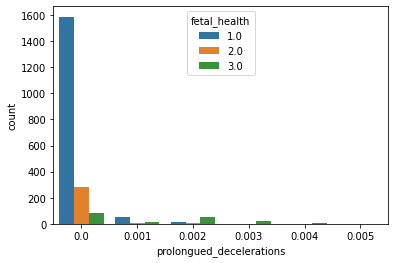

In [39]:
sns.countplot(x='prolongued_decelerations',hue='fetal_health',data=df)

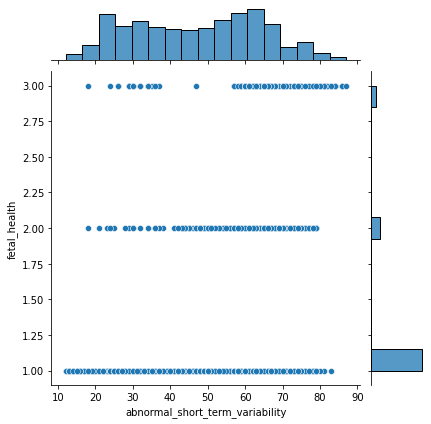

In [41]:
sns.jointplot(x='abnormal_short_term_variability',y='fetal_health',data=df)

In [12]:
x=df.drop(['fetal_health'],axis=1)
y=df['fetal_health']

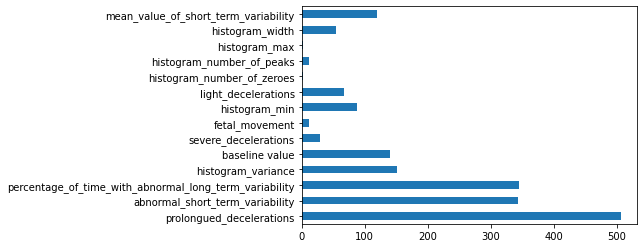

In [13]:
Feature=SelectKBest(k='all')
Feature.fit(x,y)
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [14]:
top=list(pd.Series(Feature.scores_,index=x.columns).nlargest(12).keys())

In [15]:
x=df[top]

In [16]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [18]:
LR=LogisticRegression()
LDA=LinearDiscriminantAnalysis()
SVM=SVC(gamma='auto')
Forest=RandomForestClassifier(n_estimators=11)
KNN=KNeighborsClassifier(n_neighbors=51)
Tree=DecisionTreeClassifier()
LGB=LGBMClassifier()
XGB=XGBClassifier()
GNB=GaussianNB()
BNB=BernoulliNB()

In [19]:
Algo=[LR,LDA,SVM,Forest,KNN,Tree,LGB,XGB,GNB,BNB]

In [20]:
Scores=[]
Average=[]
for i in Algo:
  cv_score=cross_val_score(i,Scaled_x,y,cv=5)
  Scores.append(cv_score)
  Average.append(cv_score.mean())

In [21]:
Score=pd.DataFrame(Scores)
Average=pd.DataFrame(Average,columns=['Averages'])
Algo_name=pd.DataFrame(['LR','LDA','SVM','Forest','KNN','Tree','LGB','XGB','GNB','BNB'],columns=['Algorithms'])

In [22]:
Table=pd.concat([Algo_name,Score],axis=1)
Table=pd.concat([Table,Average],axis=1)
Table

,Algorithms,0,1,2,3,4,Averages
0,LR,0.838028,0.880000,0.889412,0.863529,0.734118,0.841017
1,LDA,0.821596,0.832941,0.872941,0.840000,0.769412,0.827378
2,SVM,0.845070,0.887059,0.901176,0.863529,0.701176,0.839602
3,Forest,0.870892,0.912941,0.931765,0.847059,0.764706,0.865473
4,KNN,0.840376,0.858824,0.882353,0.856471,0.778824,0.843369
5,Tree,0.838028,0.792941,0.910588,0.724706,0.694118,0.792076
6,LGB,0.889671,0.905882,0.948235,0.868235,0.677647,0.857934
7,XGB,0.892019,0.929412,0.943529,0.870588,0.727059,0.872521
8,GNB,0.380282,0.303529,0.423529,0.809412,0.371765,0.457703
9,BNB,0.737089,0.776471,0.877647,0.825882,0.672941,0.778006


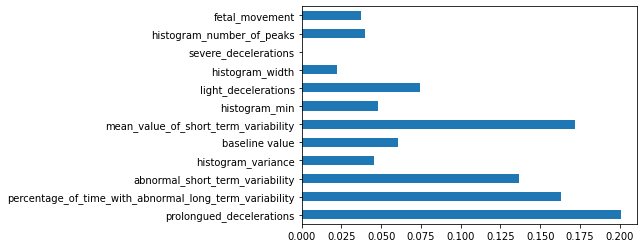

In [23]:
XGB.fit(x,y)
pd.Series(XGB.feature_importances_,index=x.columns).plot(kind='barh')

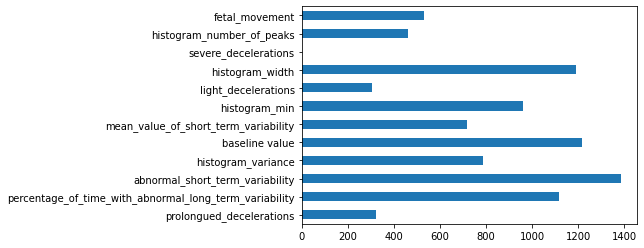

In [24]:
LGB.fit(x,y)
pd.Series(LGB.feature_importances_,index=x.columns).plot(kind='barh')

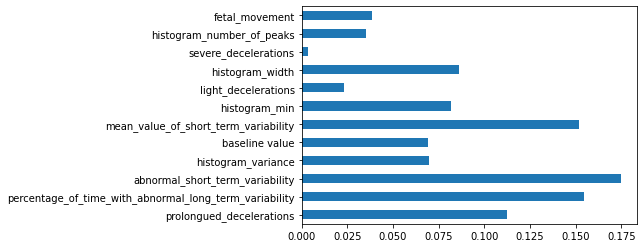

In [25]:
Forest.fit(x,y)
pd.Series(Forest.feature_importances_,index=x.columns).plot(kind='barh')

In [26]:
Average=list(Table['Averages'])
Best=Algo[Average.index(max(Average))]

In [27]:
Best.fit(xtrain,ytrain)
Best.score(xtest,ytest)

0.9225352112676056

In [28]:
Algorithms=[('LR',LR),('LDA',LDA),('SVM',SVM),('Forest',Forest),('KNN',KNN),('Tree',Tree),('LGB',LGB),('XGB',XGB),('GNB',GNB),('BNB',BNB)]
Stacking=StackingClassifier(Algorithms,final_estimator=LGB)
Stacking.fit(xtrain,ytrain)
Best.score(xtest,ytest)

0.9225352112676056

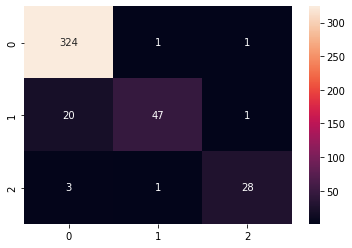

In [29]:
pred=Stacking.predict(xtest)
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [30]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96       326
         2.0       0.96      0.69      0.80        68
         3.0       0.93      0.88      0.90        32

    accuracy                           0.94       426
   macro avg       0.94      0.85      0.89       426
weighted avg       0.94      0.94      0.93       426



In [31]:
from sklearn.ensemble import VotingClassifier

In [36]:
Model=VotingClassifier(estimators=[('XGB',XGB),('lr',LGB)],voting='hard')
Model.fit(xtrain,ytrain)
Model.score(xtest,ytest)

0.9295774647887324